# 1. Importing Dependencies and Data

In [1]:
#Bringing the tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')  #this code will pick up all the gpus
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)   #this go will go to that paricular gpu

In [2]:
#Bringing in tensorfiow datasets for fasion mnist
import tensorflow_datasets as tfds
#Bring matplotlib for bussiness stuff
from matplotlib import pyplot as plt

In [3]:
#Downloading and importing a datasets
#here we are using tensorflow datasets api for the data source
ds = tfds.load('fashion_mnist' , split='train')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteNIJLLY/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteNIJLLY/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
ds.as_numpy_iterator().next().keys()
# we can take look for both image and label as ds.as_numpy_iterator().next().['image']  or ds.as_numpy_iterator().next().['label']

dict_keys(['image', 'label'])

# 2. Visulalizing Data and Build Dataset

## We must have a practise of visulalizing the data


In [5]:
#Do some data transformation
import numpy as np


In [6]:
#setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [7]:
#getting data out of the pipeline
dataiterator.next()  #here every tymm we will hit shift+enter wwe will recieve a new data

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

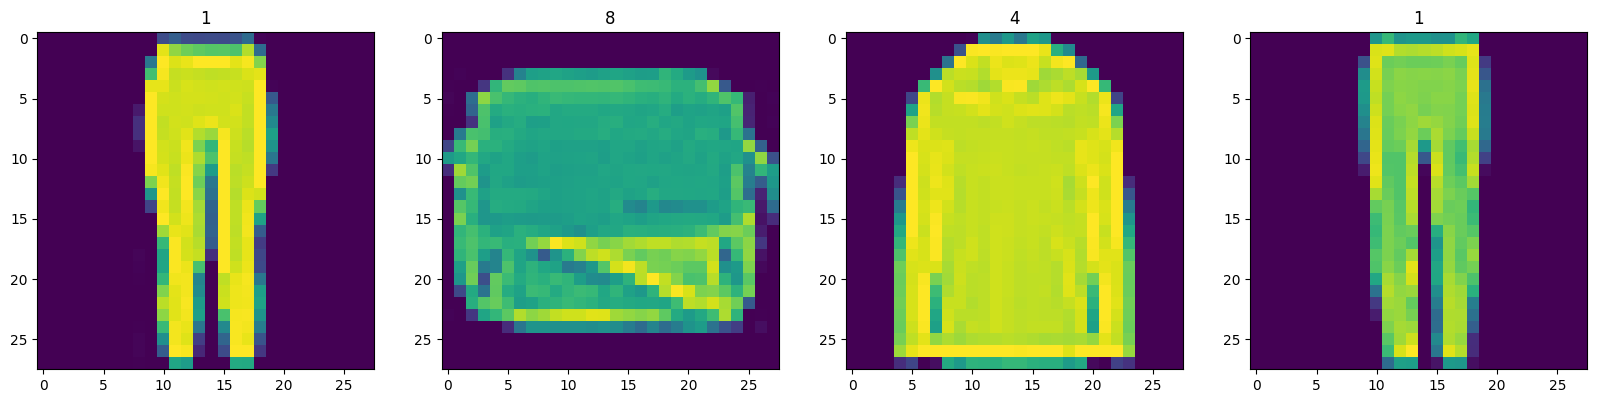

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))  #setup the subplot formatting  with 4 columns and with the total figure ie 20, 20 and here ax is different subplots
for idx in range(4):  #loop 4 times and get images
  sample = dataiterator.next() #grab and image and label
  ax[idx].imshow(np.squeeze(sample['image']))  #plot the image using a specific subplot
  ax[idx].title.set_text(sample['label'])  #give the title of the plot

In [9]:
# Doing some data pre-processing
# Right now these images are valued between 0-255 we need to bring thses value in between 0-1
# Now we will make some function that will scale and return  our images
def scale_images(data):
  image = data['image']
  return image / 255
#this neural network will perform little bit faster and better

In [10]:
#now we need to apply to the data pipeline
# whenever we are building pipeline for tensorflow dataset we must go throught map , cache , shuffle , batch and prefetch

ds = tfds.load('fashion_mnist',split='train') #reloaded the dataset
ds = ds.map(scale_images)  #Running the dataset through the scale_images preprocessing step
ds = ds.cache()   #cache the data set for that batch
ds = ds.shuffle(60000) #shuffle it up
ds = ds.batch(128) #batch into 128 images per sample
ds = ds.prefetch(64)  #reduces the likelihood of bottlenecking

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

###Here we will make 2 model one is the generator which is required for genrate images of clothing and fashion and the other is discriminator is required for learning and spoting the fakes

#3.Build Neural Network

##3.1 Import modelling components

In [12]:
from tensorflow.keras.models import Sequential  #its an API that is taking one input and giving away one output
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D  #Bringing the bunch of layer for the neural network model
#conv2d for convolution , Dense is fully connected layers , flatten is used for flating of metrices or dimension , reshape for different shape  , LeakyReLU activation function , dropout for regularization and upsampling2d for upsample of the images

##3.2 Build Generator

In [13]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128 , input_dim=128))  #we are going to generate using 128(random variable) values that in future will be converted in size 7*7 that is what our dense layer going to do
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

#output shape are coming 7,7,128 we need to increase it to 28,28

  #adding bunch more layer

  #upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5, padding='same'))
  model.add(LeakyReLU(0.2))
#output shape are coming 14,14,128 we need to increase it to 28,28

  #upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5, padding='same'))
  model.add(LeakyReLU(0.2))

  #convolutional block 1
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))

  #convolutional block 1
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))
#here we are able to get 28,28,128
# now its time to make anothe conv layer to bring 28,28,128 to 28,28,1
  model.add(Conv2D(1,4, padding='same' , activation='sigmoid')) #because value are between 0 and 1
  return model

In [14]:
generator = build_generator()

In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [16]:
img = generator.predict(np.random.randn(4,128,1))  #generating 4 different images
img

1/1 [==============================] - 0s 326ms/step


array([[[[0.5043249 ],
         [0.5040776 ],
         [0.49915868],
         ...,
         [0.5012078 ],
         [0.49639326],
         [0.49832538]],

        [[0.5137876 ],
         [0.51045173],
         [0.50434893],
         ...,
         [0.5019163 ],
         [0.49469018],
         [0.49795675]],

        [[0.5095532 ],
         [0.50886   ],
         [0.50649935],
         ...,
         [0.50240374],
         [0.49705794],
         [0.49860144]],

        ...,

        [[0.50579464],
         [0.508551  ],
         [0.5012982 ],
         ...,
         [0.5024256 ],
         [0.5022416 ],
         [0.49999455]],

        [[0.506422  ],
         [0.509588  ],
         [0.50419486],
         ...,
         [0.50286096],
         [0.5007204 ],
         [0.50117487]],

        [[0.49893168],
         [0.50262207],
         [0.49997213],
         ...,
         [0.5026217 ],
         [0.50063324],
         [0.4997566 ]]],


       [[[0.4995378 ],
         [0.49579507],
         [0.49

In [17]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 117ms/step


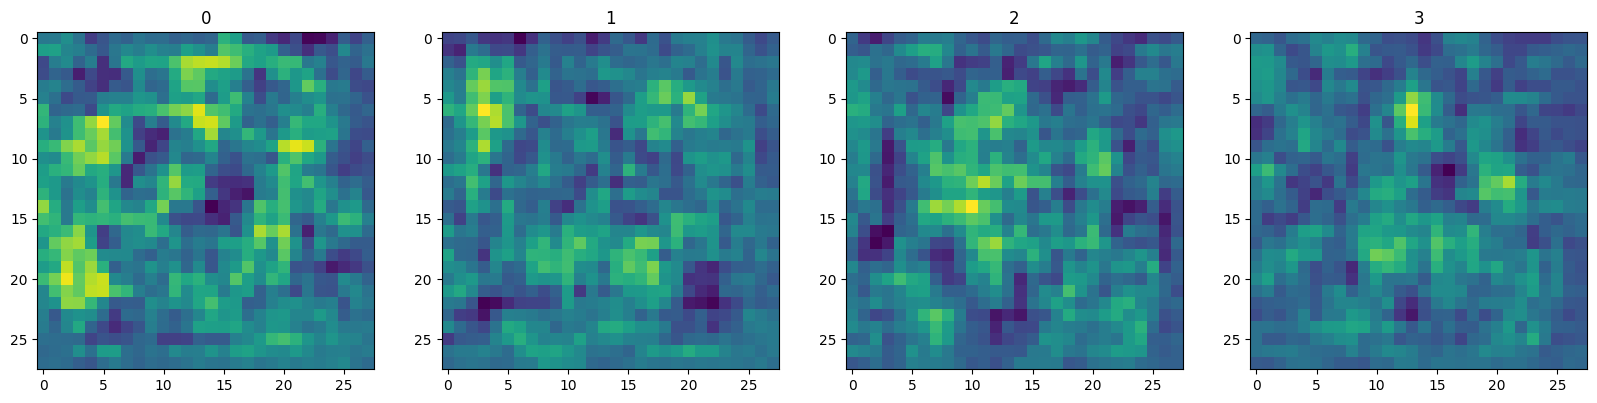

In [18]:
img = generator.predict(np.random.randn(4,128,1))  #generating 4 different images
#using matplotlib to view what our random image is going to loook like
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

##3.3 Build Discriminator

In [19]:
def build_discriminator():
  model = Sequential()
  #first convulutional block
  model.add(Conv2D(32,5, input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #second convulutional block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #third convulutional block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #fourth convulutional block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #flatten the model then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
# outputput is 1 which will represent true or false
  return model

In [20]:
discriminator = build_discriminator()

In [21]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [23]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 349ms/step


In [24]:
discriminator.predict(img)

1/1 [==============================] - 0s 108ms/step


array([[0.49347088],
       [0.4933509 ],
       [0.49332458],
       [0.49325052]], dtype=float32)

#4. Construct Training Loop

##4.1 Setup some losses and optimizers

In [27]:
from tensorflow.keras.optimizers import Adam # it is going to be the optimizer for both (both means discriminator and generator)
from tensorflow.keras.losses import BinaryCrossentropy # it iss going to optimize loss for both

In [29]:
g_opt = Adam(learning_rate=0.0001)    #for the generator
d_opt = Adam(learning_rate=0.00001)   #for the discriminator

In [31]:
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

##4.2 Build the subclassed Model

In [33]:
from tensorflow.keras.models import Model  #importing base model class to sub class

In [70]:
# class FashionGAN(Model):
#   def __init__(self, generator, discriminator, *args, **kwargs):  #args positional argument and kwargs is keyword argument
#     super().__init__(*args, **kwargs)

#     #create a attribute for gen and dis
#     self.generator= generator
#     self.discriminator= discriminator

#   def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
#     super().compile(*args, **kwargs)   #complie with base class
#     #create attribute for each one of these
#     self.g_opt = g_opt
#     self.d_opt = d_opt
#     self.g_loss = g_loss
#     self.d_loss = d_loss
#   def train_step(self, batch):   # in our case batch is 128
#     #getting the data
#     real_images = batch
#     fake_images = self.generator(tf.random.normal((128,128,1)), training = False)
#     #train our discriminator
#     with tf.GradientTape() as d_tape:
#       #step 1 pass the real and fake images to discriminator model
#       yhat_real = self.discriminator(real_images, training = True)  #taking real images and paasing throughr or discriminator
#       yhat_fake = self.discriminator(fake_images, training = True)   #taking fake images and paasing throughr or discriminator
#       yhat_realfake = tf.concat([yhat_real,yhat_fake], axis = 0)   ##concatinating both real and fake images
#       #create labels for real and fake images
#       yhat_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
#       #add some noise true outputs
#       noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
#       noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
#       y_realfake += tf.concat([noise_real, noise_fake], axis=0)
#       #calculate loss
#       total_d_loss = self.d_loss(y_realfake, yhat_realfake)
#     #apply backpropogation nn learn
#     dgrad = d_tape.gradient(total_d_loss, self.dicriminator.trainable_variables)
#     self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

#     #train the generator
#     with tf.GradientTape() as g_tape:
#       #generate some new images
#       gen_images = self.generator(tf.random.normal((128,128,1)),training= True)
#       #create a predictable label
#       predicted_labels= self.discriminator(gen_images, training = False)
#       #calculate loss -trick to training to fake out discriminator
#       total_g_loss = self.g_loss(t.zeros_like(predicted_labels), predicted_labels)
#     #apply backproporgation
#     ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
#     self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

#     return{"d_loss":total_d_loss, "g_loss":total_g_loss}

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Model

class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)), training=False)

        with tf.GradientTape() as d_tape:
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
            predicted_labels = self.discriminator(gen_images, training=False)
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss": total_d_loss, "g_loss": total_g_loss}


In [78]:
#create instance of subclass model
fashgan = FashionGAN(generator , discriminator)

In [79]:
#compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

##4.3 Build Callback

In [80]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [81]:
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images = self.model.generator(random_latest_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array+to_img(generated_images[i])
      img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

##4.3 Train

In [ ]:
#recommend 2000 epoch
hist = fashgan.fit(ds,epochs=20, callbacks=[ModelMonitor()])

##4.4 Review Performance

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

#5. Test Out the Generator


##5.1 Generate Images


In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))


In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))


In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

##5.2 Save the Model


In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')